In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro,kstest
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [8]:
df=pd.read_csv('car data.csv')
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.drop('Car_Name',axis=1,inplace=True)

In [11]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [13]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [15]:
df['Fuel_Type'].replace({'CNG':0,'Diesel':1,'Petrol':2},inplace=True)

In [16]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,2015,4.00,5.90,60000,2,Dealer,Manual,0
298,2009,3.35,11.00,87934,2,Dealer,Manual,0
299,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [17]:
df['Seller_Type'].replace({'Dealer':0,'Individual':1},inplace=True)


In [18]:
df['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)

In [19]:
df['Transmission'].value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [20]:
df1=df.drop('Selling_Price',axis=1)
df1

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,2,0,0,0
3,2011,4.15,5200,2,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,2,0,0,0
298,2009,11.00,87934,2,0,0,0
299,2017,12.50,9000,1,0,0,0


# outliers

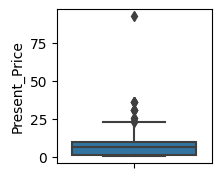

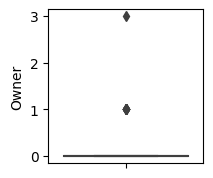

In [21]:
df2=df1[['Present_Price','Owner']]
for i in df2.columns:
    plt.figure(figsize=(2,2))
    sns.boxplot(y=df1[i])
    

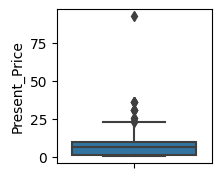

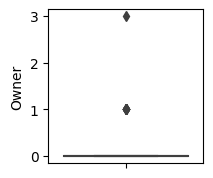

In [22]:
for i in df2.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lt=q1-1.5*iqr
    ut=q3+1.5*iqr
    df2.loc[df2[i]<lt,i]=lt
    df2.loc[df2[i]>ut,i]=ut
    plt.figure(figsize=(2,2))
    sns.boxplot(y=df1[i])
    plt.show()


# assumption

# 1 linearity

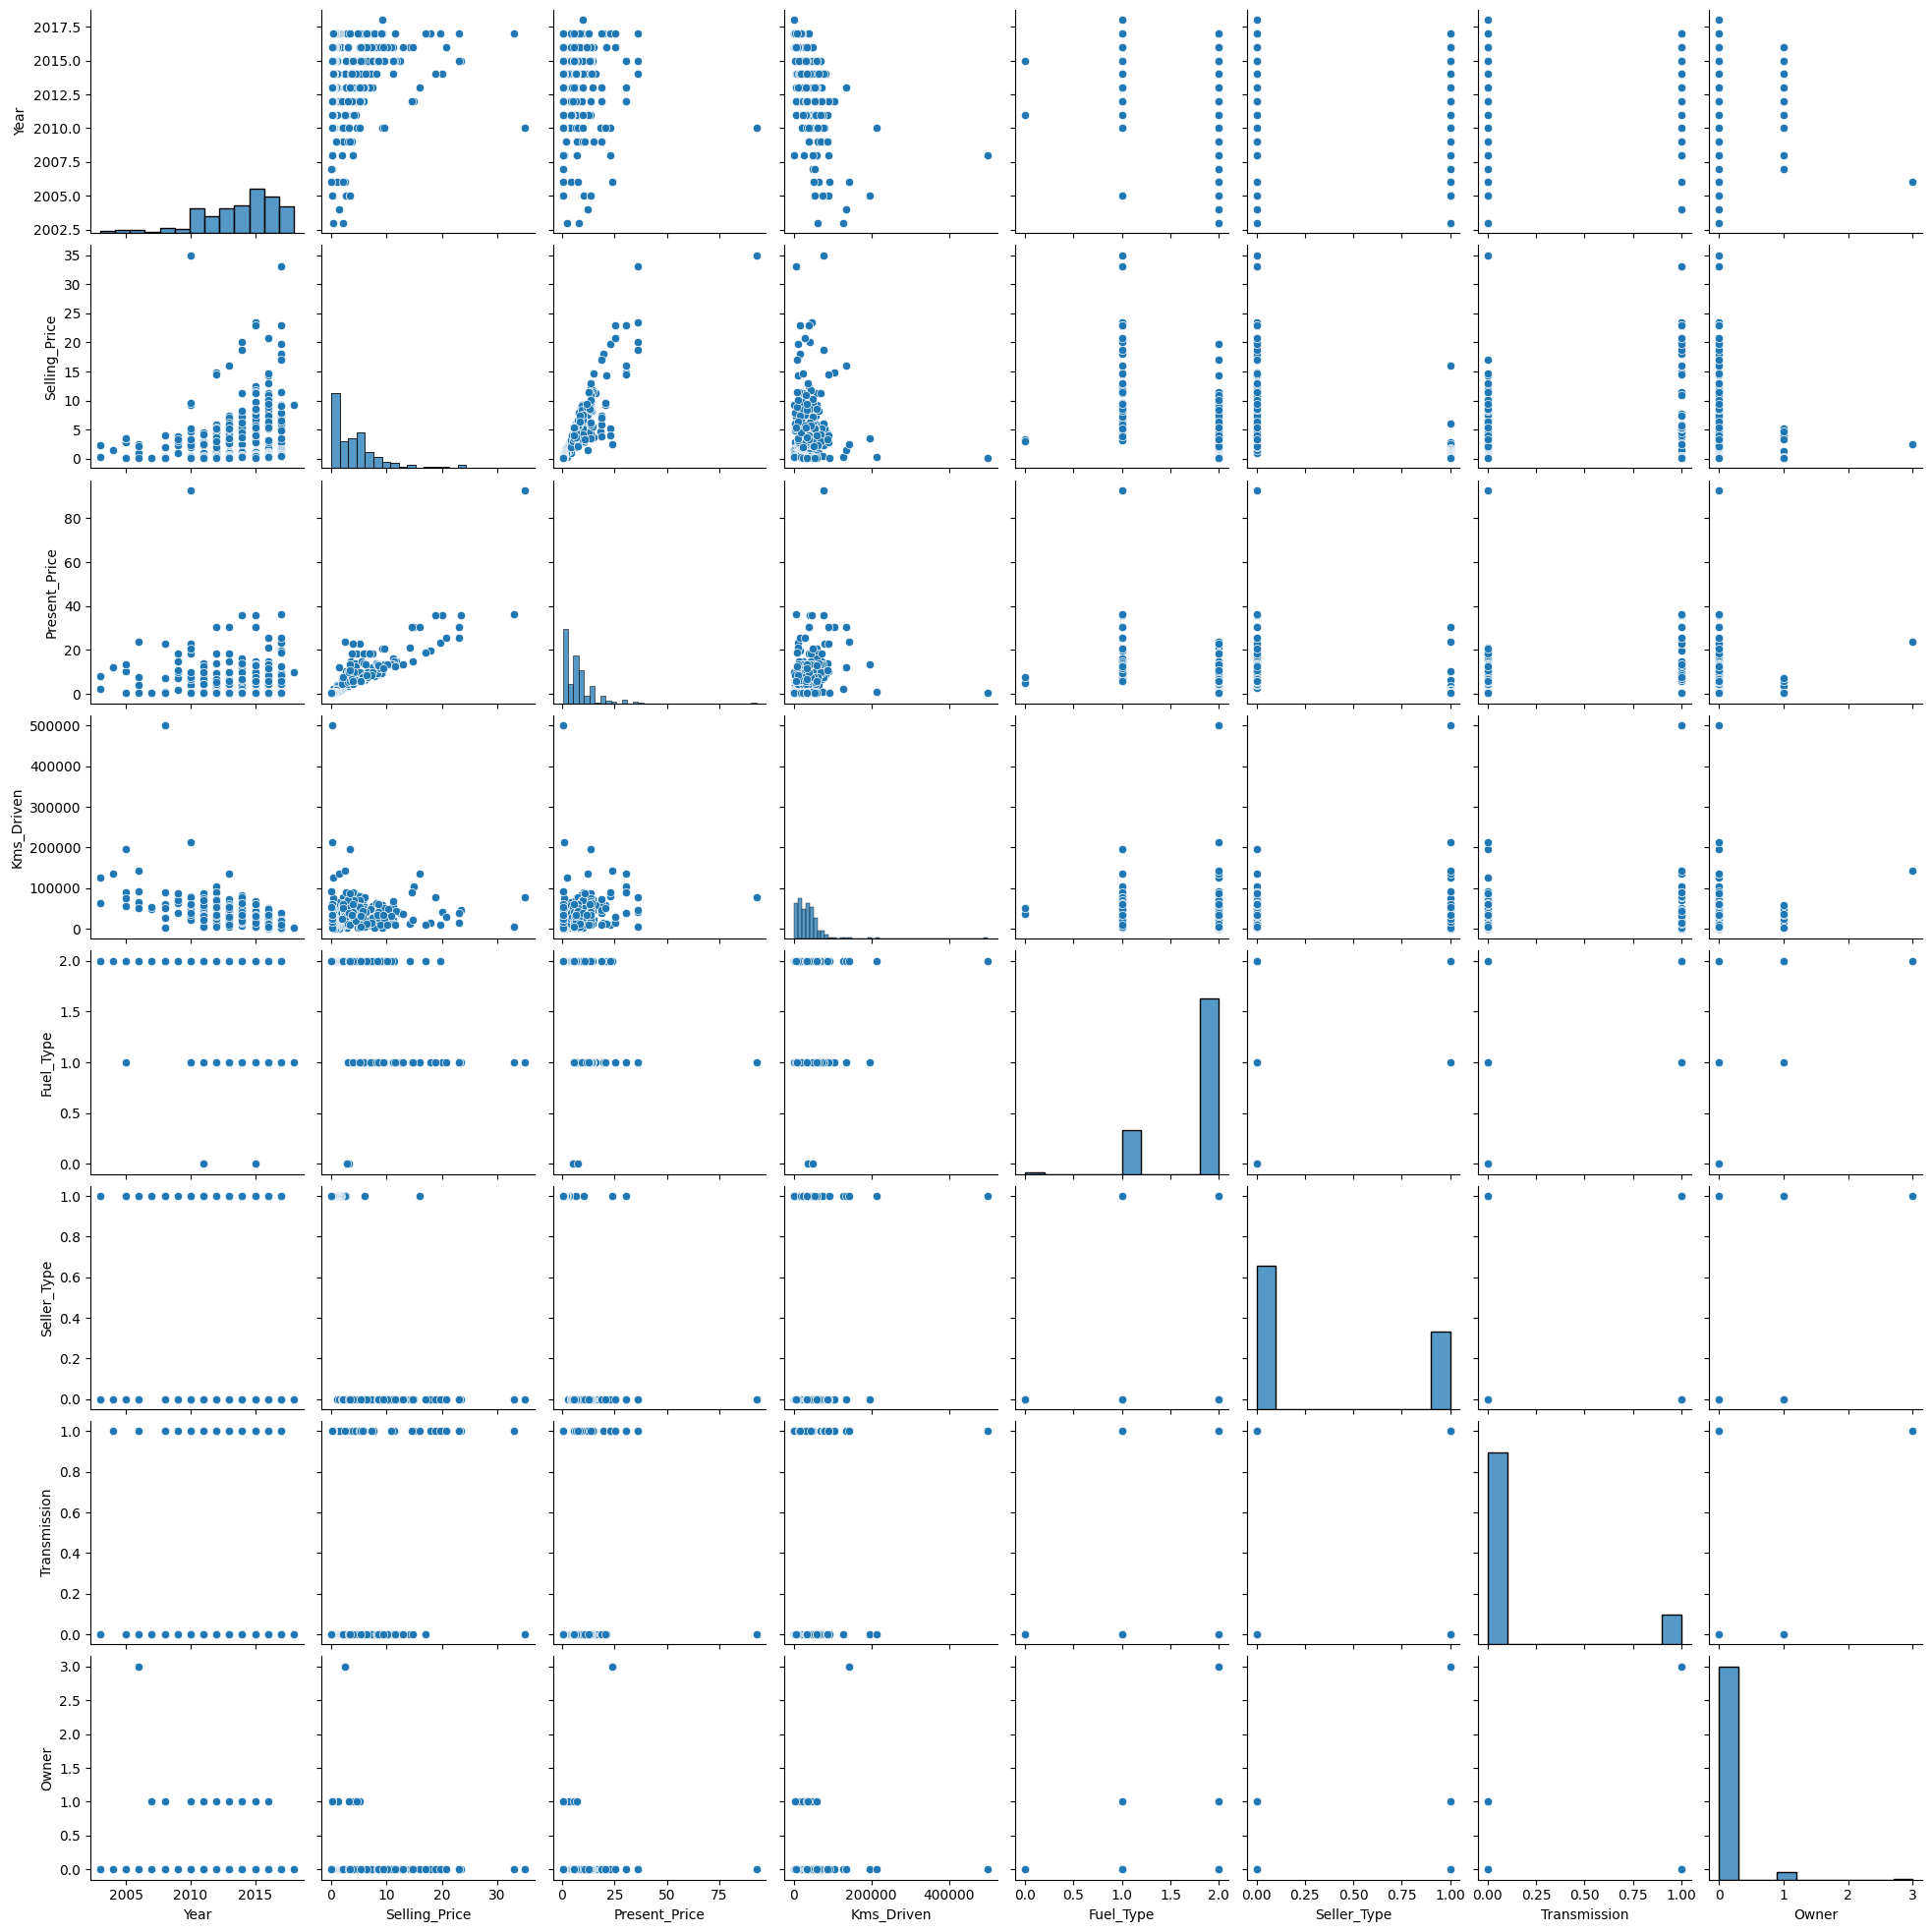

In [23]:
sns.pairplot(df)

In [24]:
df.corr()[1:2]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Selling_Price,0.236141,1.0,0.878983,0.029187,-0.509467,-0.550724,0.367128,-0.088344


# independace

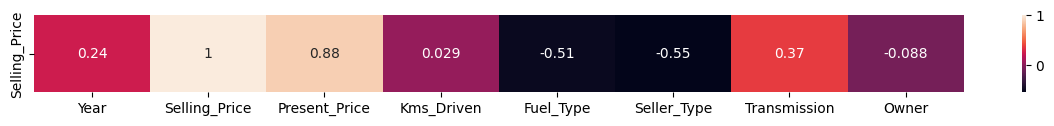

In [25]:

plt.figure(figsize = (15,1))
sns.heatmap(df.corr()[1:2],annot = True)
plt.show()

# no multo-colinearity

In [26]:
# vif

In [27]:
for i in range(len(df1.columns)):
    vif = variance_inflation_factor(df1,i)
    print('*************************************',"\nvif")
    print(f"{df1.columns[i]} = {vif}")

************************************* 
vif
Year = 30.135120308020607
************************************* 
vif
Present_Price = 3.1633037827671378
************************************* 
vif
Kms_Driven = 2.0405971721563745
************************************* 
vif
Fuel_Type = 24.16202010055514
************************************* 
vif
Seller_Type = 2.2293301490801403
************************************* 
vif
Transmission = 1.3617879267438402
************************************* 
vif
Owner = 1.0658858896471308


# model training

In [28]:
x=df1
y=df['Selling_Price']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 7), (91, 7), (210,), (91,))

In [31]:
model=LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred_train=model.predict(x_train)
y_pred_train[0:5]

array([2.03394855, 3.17342895, 5.09749343, 2.45304721, 6.77643936])

In [34]:
y_train[0:5]

227    2.55
155    0.48
48     5.80
101    1.70
55     3.60
Name: Selling_Price, dtype: float64

In [35]:
y_pred_test=model.predict(x_test)
y_pred_test[0:5]

array([4.2974689 , 6.14727963, 7.14271551, 6.33617037, 3.85578021])

In [36]:
y_test[0:5]

294    3.75
208    7.90
18     3.25
43     5.50
241    4.75
Name: Selling_Price, dtype: float64

In [37]:
train_acc=model.score(x_train,y_train)
train_acc

0.8833249177813706

In [38]:
test_acc=model.score(x_test,y_test)
test_acc

0.8552241812448217

In [39]:
residual=y_test-y_pred_test
residual

294   -0.547469
208    1.752720
18    -3.892716
43    -0.836170
241    0.894220
         ...   
111   -0.743093
191    1.315944
279   -0.792555
218    1.140929
232    2.144976
Name: Selling_Price, Length: 91, dtype: float64

# normality

<Axes: xlabel='Selling_Price', ylabel='Density'>

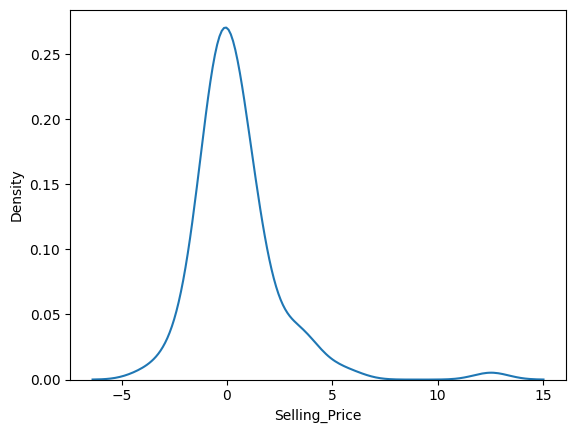

In [40]:
sns.kdeplot(residual)

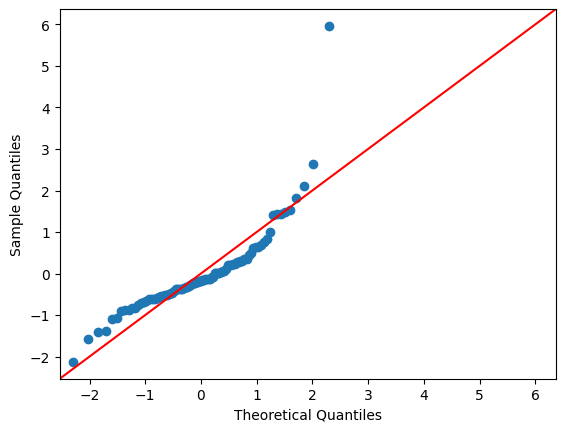

In [41]:
sm.qqplot(residual,stats.norm,fit = True,line = '45')
plt.show()

In [42]:
stats,p_value = shapiro(residual)
if p_value > 0.05 :
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
else:
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 1.0668407268710212e-09
Residuals are not normally distributed


In [43]:
stats,p_value = kstest(residual,'norm')
if p_value > 0.05 :
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
else:
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 0.08348994487568784
Residuals are normally distributed


# homoscadasticity

In [44]:
sns.scatterplot(y_test,residual)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

# model eval

In [ ]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    print(f"Mse = {mse}")
    
    mae = mean_absolute_error(y,y_pred)
    mae = mean_absolute_error(y,y_pred)
    
    rmse = np.sqrt(mse)
    print(f"rmse = {rmse}")
    
    r2 = r2_score(y,y_pred)
    print(f"r2_ score = {r2}")
    
    adj_r2 = (((1-r2)*(x.shape[0] - 1))/(x.shape[0] - x.shape[1] -1))
    print(f"Adj_r2 = {adj_r2}")
    return

In [ ]:
model_eval(x_train,y_train,model)

Mse = 2.7981321308316094
rmse = 1.6727618272879166
r2_ score = 0.8833249177813708
Adj_r2 = 0.12071827813709655


In [ ]:
model_eval(x_test,y_test,model)

Mse = 4.3109471730496915
rmse = 2.0762820552732455
r2_ score = 0.8552241812448003
Adj_r2 = 0.15698582756587923


In [ ]:
df1

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,2,0,0,0
3,2011,4.15,5200,2,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,2,0,0,0
298,2009,11.00,87934,2,0,0,0
299,2017,12.50,9000,1,0,0,0


# knn Regressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x)
arr = normal_scaler.transform(x)
x_norm = pd.DataFrame(arr,columns = x.columns)

# model training

In [ ]:
x_norm

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.733333,0.057109,0.053053,1.0,0.0,0.0,0.0
1,0.666667,0.099913,0.085085,0.5,0.0,0.0,0.0
2,0.933333,0.103273,0.012813,1.0,0.0,0.0,0.0
3,0.533333,0.041504,0.009409,1.0,0.0,0.0,0.0
4,0.733333,0.070980,0.083984,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...
296,0.866667,0.122237,0.067043,0.5,0.0,0.0,0.0
297,0.800000,0.060468,0.119119,1.0,0.0,0.0,0.0
298,0.400000,0.115735,0.175043,1.0,0.0,0.0,0.0
299,0.933333,0.131990,0.017017,0.5,0.0,0.0,0.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,train_size = 0.7,random_state = 10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 7), (91, 7), (210,), (91,))

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
model_eval(x_test,y_test,knn)

Mse = 2.9298588571428574
rmse = 1.7116830480970644
r2_ score = 0.8832099036673625
Adj_r2 = 0.12663986349322137


In [ ]:
model_eval(x_train,y_train,knn)

Mse = 4.594232704761906
rmse = 2.1434161296308996
r2_ score = 0.8234214739792443
Adj_r2 = 0.18269758385315818


# serialization

## User Defined Function

In [ ]:
import pickle
import json

In [ ]:
with open('car_prise_pred.pkl','wb') as file:
    pickle.dump(model,file)

In [ ]:
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car_info = {"column_name":x.columns.tolist(),
             "Fuel_Type":{'CNG':0,'Diesel':1,'Petrol':2},
             "Seller_Type":{'Dealer':0,'Individual':1},
             "Transmission":{'Manual':0,'Automatic':1}
            }

with open ('car_info.json','w') as file:
    json.dump(car_info,file)

In [ ]:
Year = 2015
Present_Price = 20
Kms_Driven =80000
FUEL = "Diesel"
TYPE_OF_SELLER = "Individual"
TRANSMISSION_TYPE = "Manual"
Owner = 1

In [ ]:
Fuel_Type = car_info["Fuel_Type"][FUEL]
Seller_Type = car_info["Seller_Type"][TYPE_OF_SELLER]
Transmission = car_info["Transmission"][TRANSMISSION_TYPE]



In [ ]:
user_data=np.zeros(len(x.columns))

user_data[0]= Year
user_data[1]= Present_Price
user_data[2]= Kms_Driven
user_data[3]= Fuel_Type
user_data[4]= Seller_Type
user_data[5]= Transmission
user_data[6]= Owner

result=model.predict([user_data])[0]
print(result)


9.362425026429719


C:\anacondaaa\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
